In [2]:
# 5.1.1 선형 회귀

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [5]:
class LinearRegressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1,1,bias=True)    # 입력 변수 개수, 출력 변수 개수

  def forward(self, x):
    y = self.fc(x)

    return y

In [6]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
loss_stack = []
for epoch in range(1001):

  optimizer.zero_grad()

  y_hat = model(x)
  loss = criterion(y_hat, y)

  loss.backward()
  optimizer.step()
  loss_stack.append(loss.item())

  if epoch % 100 == 0:
    print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:47.07891082763672
Epoch 100:3.2293033599853516
Epoch 200:0.27861088514328003
Epoch 300:0.07999428361654282
Epoch 400:0.06657028198242188
Epoch 500:0.06561433523893356
Epoch 600:0.06550333648920059
Epoch 700:0.0654543787240982
Epoch 800:0.06541424989700317
Epoch 900:0.06537890434265137
Epoch 1000:0.06534761190414429


In [8]:
with torch.no_grad():
  y_hat = model(x)

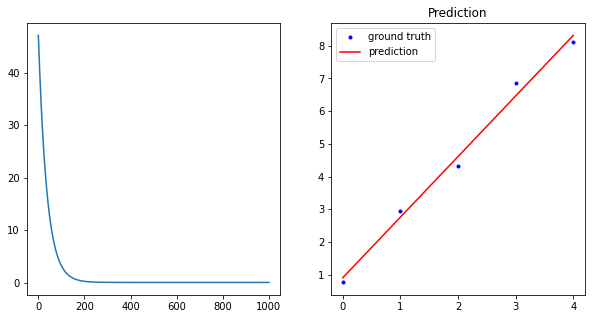

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")
plt.show()